# Семинар 12. Matplotlib_3

5. Элементы рисунка

    5.1. Подписи к осям `xlabel`, `ylabel`
    
    5.2. Заголовок `title`
    
    5.3. Засечки `ticks` и подписи к ним `ticklabels`
    
    5.4. Сетка `grid`


6. Сохранение рисунка `savefig`


7. Построение контурных карт

    7.1. `contour`, `contourf`
    
    7.2. `tricontour`, `tricontourf`


8. Трехмерный рисунок
    

In [2]:
import numpy as np
import matplotlib.pyplot as plt

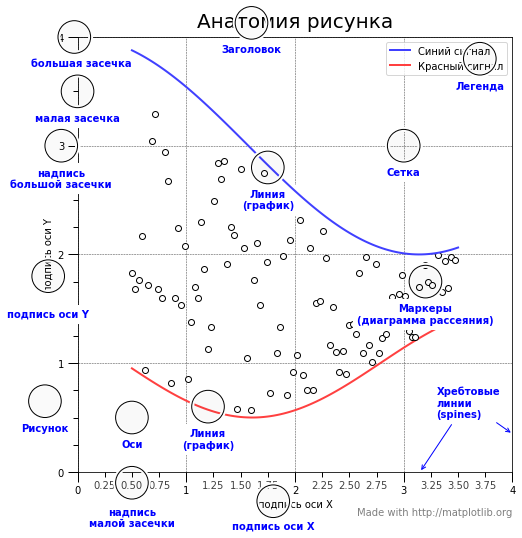

In [3]:
import figure_anatomy

## `xlabel`, `ylabel`

Подписи к осям `x` и `y`.

`plt.xlabel(label, ...)` или `ax.set_xlabel(label, ...)` - к оси `x`

`plt.ylabel(label, ...)` или `ax.set_ylabel(label, ...)` - к оси `y`


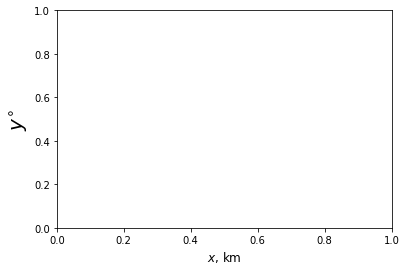

In [3]:
plt.xlabel('$x$, km', fontsize = 12)
plt.ylabel('$y^{\circ}$', fontsize = 20);

## `ticks`, `ticklabels`

Засечки на осях позволяют лучше ориентироваться в пространстве, в котором представлен график.

Разместить засечки в соответствии с массивом `ticks`

`plt.xticks(ticks, ...)` или `ax.set_xticks(ticks, ...)` - на оси `x`

`plt.yticks(ticks, ...)` или `ax.set_yticks(ticks, ...)` - на оси `y`

Указать подписи к засечкам в соответствии с массивом `labels`

`ax.set_xticklabels(labels, ...)` - на оси `x`

`ax.set_yticklabels(labels, ...)` - на оси `y`


In [4]:
[r'$\frac{%d\pi}{4}$'%i for i in range(9)]

['$\\frac{0\\pi}{4}$',
 '$\\frac{1\\pi}{4}$',
 '$\\frac{2\\pi}{4}$',
 '$\\frac{3\\pi}{4}$',
 '$\\frac{4\\pi}{4}$',
 '$\\frac{5\\pi}{4}$',
 '$\\frac{6\\pi}{4}$',
 '$\\frac{7\\pi}{4}$',
 '$\\frac{8\\pi}{4}$']

In [6]:
plt.rcParams.update({'font.size': 20.0})
#plt.rcParams['font.size'] = 20.0

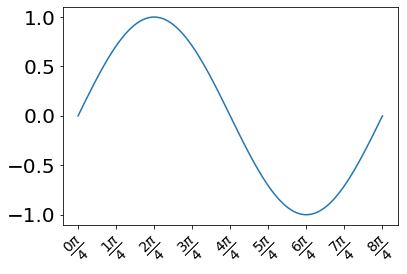

In [8]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
plt.plot(x, y)

ax = plt.gca()
plt.xticks(np.arange(0, 2*np.pi+0.1, np.pi/4))
#plt.xticks(np.arange(0, 2*np.pi+0.1, np.pi/4), [r'$\frac{%d\pi}{4}$'%i for i in range(9)])
ax.set_xticklabels([r'$\frac{%d\pi}{4}$'%i for i in range(9)], rotation=45)
plt.yticks(np.arange(-1, 1+0.1, 0.5));


## `grid`

Отображает сетку. Сетка строится по засечкам.

`plt.grid(b=None, which='major', axis='both', **kwargs)`

`b` - отобразить сетку или скрыть

`which` - по каким засечкам строить сетку (`major`, `minor` или `both`)

`axis` - по какой оси отобразить линии сетки (`both`, `x`, `y`)

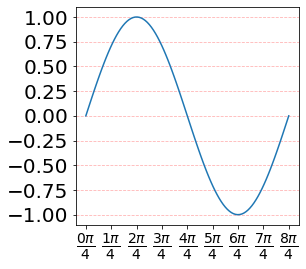

In [10]:
plt.figure(figsize=(4, 4))
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
plt.plot(x, y)

plt.xticks(np.arange(0, 2*np.pi+0.1, np.pi/4), [r'$\frac{%d\pi}{4}$'%i for i in range(9)])
plt.yticks(np.arange(-1, 1+0.1, 0.25));
plt.grid(axis='y', ls='--', color='r', alpha=0.3)

## `savefig`

Позволяет сохранить график в виде изображения в разных форматах.

Синтаксис вызова:

- `plt.savefig(path, dpi, ...)`
- `fig.savefig(path, dpi, ...)`

`path` - путь к сохраняемому файлу; **расширение влияет на формат файла!**

`dpi` - физическое разрешение (точек на дюйм)

`bbox_inches` - размеры bounding box; значение `'tight'` минимизирует белую рамку вокруг рисунка

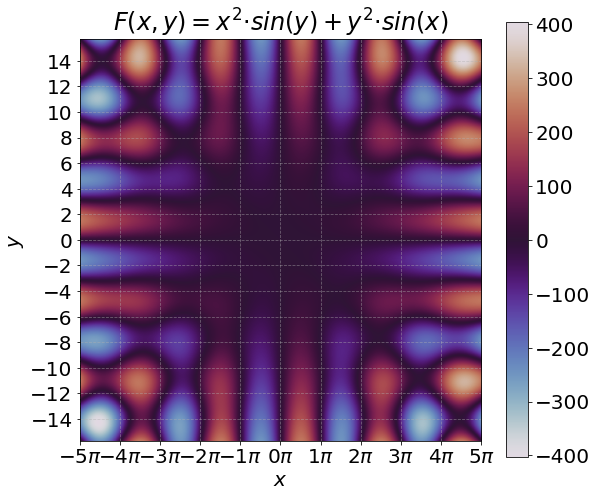

In [20]:
x = np.linspace(-5*np.pi, 5*np.pi,512)
y = x.reshape(-1,1)
z = x**2 * np.sin(y) + y**2 * np.sin(x)

fig, ax = plt.subplots(1, 1, figsize=(9, 8))
im = ax.imshow(z, origin='lower', cmap='twilight', interpolation='bilinear',
               extent=[x.min(), x.max(), y.min(), y.max()])

fig.colorbar(im)
ticks = np.arange(-5*np.pi, 5*np.pi+1, np.pi)
labels = [rf'${t}\pi$' for t in range(-5, 6)]
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(-14, 15, 2))
ax.grid(ls='--', alpha=0.5)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title(r'$F(x, y) = x^2 {\cdot} sin(y) + y^2 {\cdot} sin(x)$')

fig.savefig('x2siny_plus_y2sinx.png', dpi=300, bbox_inches='tight');

(-0.5, 2489.5, 2058.5, -0.5)

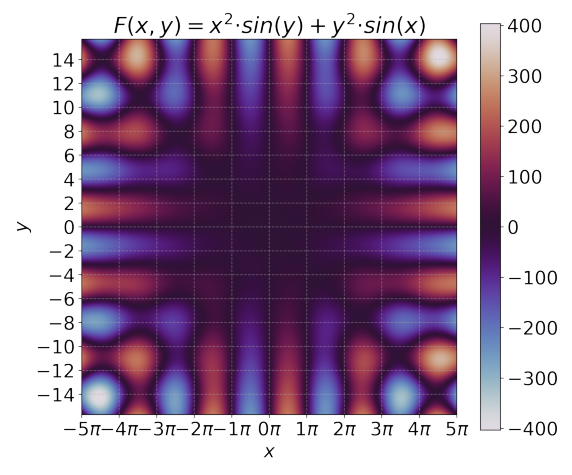

In [21]:
plt.figure(figsize=(10, 10))
plt.imshow(plt.imread('x2siny_plus_y2sinx.png'))
plt.axis('off')

## Задание

Нарисовать изображение функции $F(x, y) = \frac{1}{1+x^2} + \frac{1}{1+y^2}$

Явно указать засечки

Сделать подписи к осям

Сделать заголовок к рисунку

Отобразить цветовую шкалу

Сохранить изображение в разрешении `200 dpi`

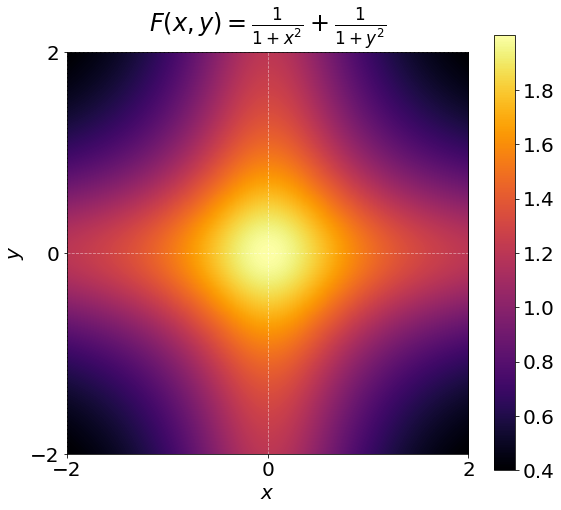

In [23]:
x = np.linspace(-2, 2,512)
y = x.reshape(-1,1)
z = 1/(1+x**2)+1/(1+y**2)

fig, ax = plt.subplots(1, 1, figsize=(9, 8))
im = ax.imshow(z, cmap='inferno', interpolation='bilinear',
               extent=[x.min(), x.max(), y.min(), y.max()])

fig.colorbar(im)
ax.set_xticks(np.arange(-2, 3, 2))
ax.set_yticks(np.arange(-2, 3, 2))
ax.grid(ls='--', color='w', alpha=0.5)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title(r'$F(x, y) = \frac{1}{1+x^2} + \frac{1}{1+y^2}$')

fig.savefig('pic1.png', dpi=200)

## `contour`, `contourf`

`contour` визуализирует контурную карту - только набор изолиний заданных уровней
`contourf` закрашивает области между изолиниями в соответствии с цветовой картой (изолинии не рисует)

Синтаксис вызова:

`plt.contour([X, Y,] Z, [levels], **kwargs)`

`plt.contourf([X, Y,] Z, [levels], [cmap], **kwargs)`

`X`, `Y` - массивы, задающие регулярную сетку; либо двумерные массивы такого же размера, что и `Z`, либо одномерные массивы и `Z.shape == (len(Y), len(X))`

`Z` - массив значений функции `Z(x, y)`

`levels` - набор уровней, для которых нужно отрисовать изолинии

`cmap` - цветовая карта для изображения областей


In [24]:
def surface(W, H, sensors):
    y, x = np.mgrid[:W, :H]
    pts = np.column_stack((x.ravel(), y.ravel()))
    v = sensors[None, :, :2] - pts[:, None]
    d = np.sum(v**2, axis=2)**0.5
    res = np.max(1 - d / sensors[:,-1], axis=1)
    return x, y, res.reshape((W, H))

In [25]:
rng = np.random.default_rng()

In [29]:
W, H = 200, 150
N = 3
sensors = np.column_stack((rng.uniform(0, W, N),
                           rng.uniform(0, H, N),
                           rng.uniform(20, 150, N)))
sensors

array([[ 28.41267567, 134.0543737 ,  62.6979258 ],
       [140.2529163 ,  19.87902776, 129.19647672],
       [101.29158951, 146.05120796, 100.92731732]])

In [30]:
X, Y, Z = surface(W, H, sensors)

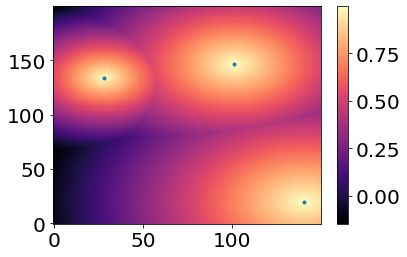

In [31]:
plt.figure()
plt.pcolormesh(X, Y, Z, cmap = 'magma', shading='auto')
plt.plot(sensors[:, 0], sensors[:, 1], '.')
plt.colorbar()
#plt.contourf(Z, levels=20)

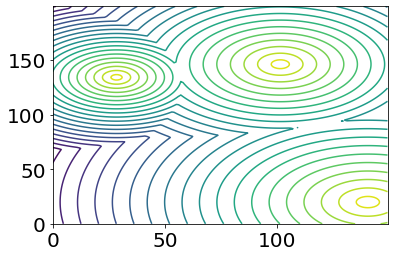

In [33]:
plt.contour(Z, levels=20)#[0, 0.1, 0.2, 0.3])

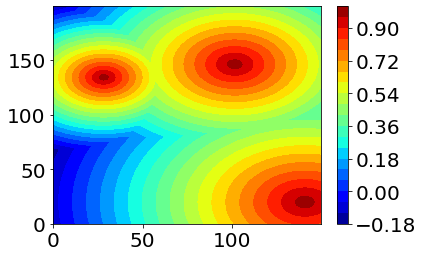

In [34]:
plt.contourf(Z, levels=20, cmap='jet')
plt.colorbar()

## Задание

Нарисовать контурную карту функции:

$F(x, y) = 2(x-5)^2 + (y-10)^2 - 0.2(x-5)^3$, $x \in [0, 15]$, $y \in [0, 20]$

Сделать подписи к осям

Сделать заголовок к рисунку

Отобразить цветовую шкалу

Сохранить изображение в формате `pdf` и разрешении `300 dpi`

<ipython-input-47-bc712be7629c>:7: UserWarning: The following kwargs were not used by contour: 'lw'
  plt.contour(z, levels=20, colors='k', lw=1)


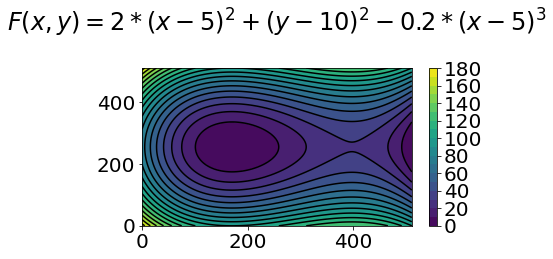

In [47]:
x = np.linspace(0, 15, 512)
y = np.linspace(0, 20, 512).reshape(-1,1)
z = 2*(x-5)**2 + (y-10)**2 - 0.2*(x-5)**3

plt.figure()
c = plt.contourf(z, levels=20)
plt.contour(z, levels=20, colors='k', lw=1)
plt.title('$F(x, y) = 2*(x-5)^2 + (y-10)^2 - 0.2*(x-5)^3$\n')

plt.colorbar(c)
plt.tight_layout()
plt.savefig('x2siny_plus_y2sinx.pdf', dpi=300, bbox_inches='tight')

## Трехмерный график

[Документация](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)

```
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

```

In [48]:
from mpl_toolkits.mplot3d import Axes3D

In [49]:
%matplotlib notebook

In [91]:
#%matplotlib inline

<IPython.core.display.Javascript object>


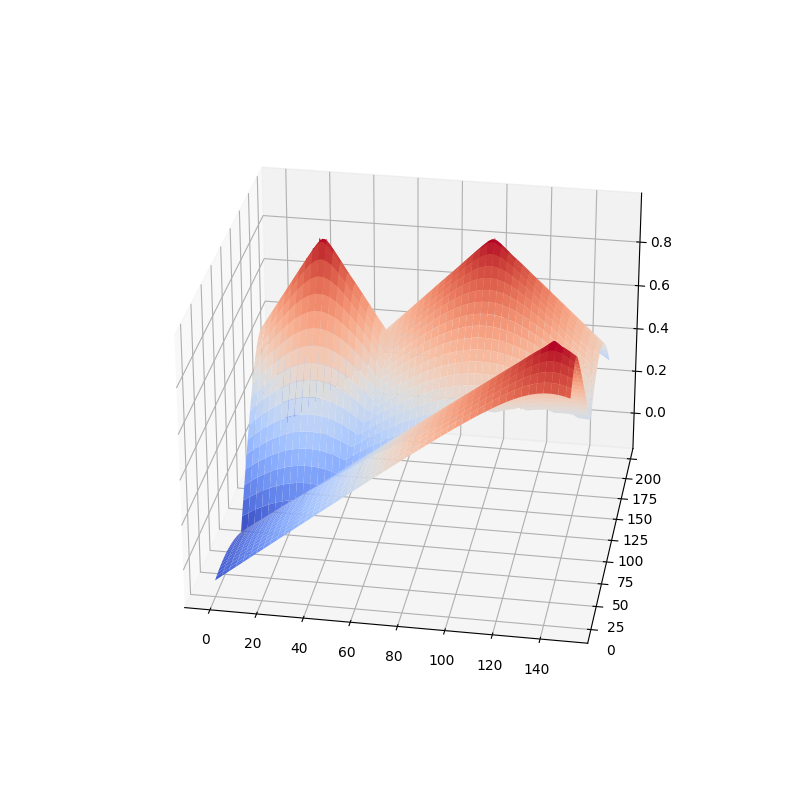

In [50]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X, Y, Z = surface(W, H, sensors)
ax.plot_surface(X, Y, Z, cmap='coolwarm', rstride=4, cstride=3)
# ax.contour(X, Y, Z, levels=[0])

<IPython.core.display.Javascript object>


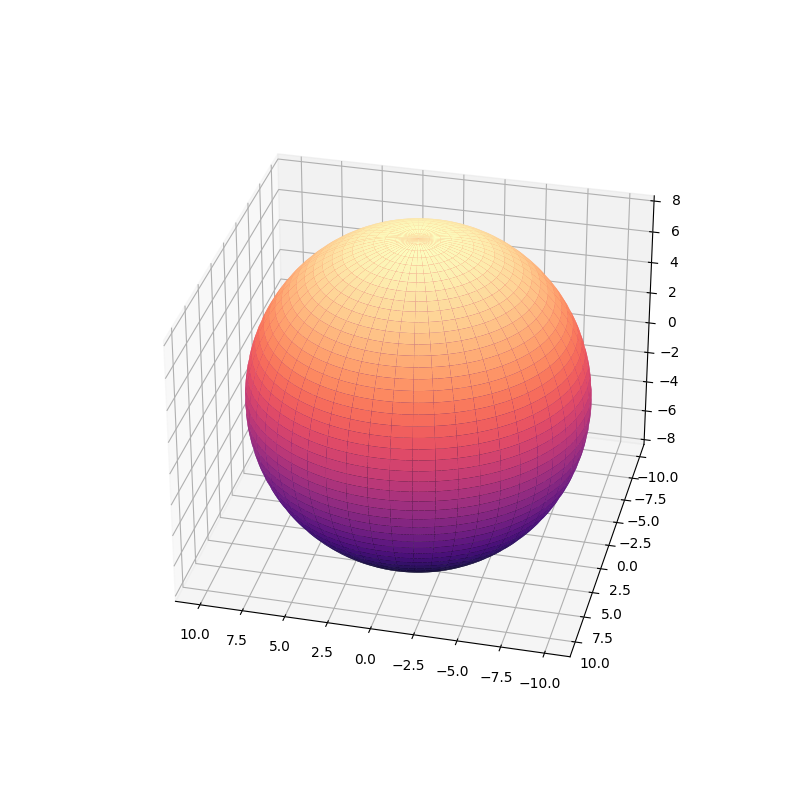

(-8.0, 8.0)

In [54]:
# шар
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

R = 10
# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)[:, None] # .reshape(-1, 1)
x = R * np.cos(u)*np.sin(v)
y = R * np.sin(u)*np.sin(v)
z = R * np.ones(np.size(u)) * np.cos(v)

# Plot the surface
ax.plot_surface(x, y, z, cmap='magma')#color='b')
ax.set_zlim(-8, 8)
#ax.set_aspect('auto')



## Задание

Изобразить поверхность тора